In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import numpy as np
import os

# List of test names for reference
test_names = ['test2_mat2', 'test1_mat2', 'test6_mat1']

# Globally visible list to store crypt dataframes
crypt_data_list_epi = []

def load_data(category, crypt_number, test_number, mat_num):
    file_name = f'crypt{crypt_number}/{category}_RF-crypt{crypt_number}_test{test_number}_mat{mat_num}.npy'
    file_path = os.path.join('.', file_name)
    matrix_data = np.load(file_path)

    # Check if matrix_data is 1-dimensional
    if matrix_data.ndim == 1:
        matrix_data = matrix_data.reshape(-1, 1)

    matrix_df = pd.DataFrame(matrix_data, columns=[file_name])
    return matrix_df

def main():
    # Crypt numbers and test numbers for each case
    crypt_numbers = ['0', '1', '2']
    test_numbers  = ['2', '1', '6']
    mat_numbers   = ['3', '3', '2']  # Load only mat2 for now
    

    global crypt_data_list  # Use the globally visible list

    for i in range(len(crypt_numbers)):
        crypt_data_sublist = []  # List for each crypt
        for category in ['coarse', 'smooth', 'para']:
            data = load_data(category, crypt_numbers[i], test_numbers[i], mat_numbers[i])
            crypt_data_sublist.append(data)
            print(f"\nCRYPT{crypt_numbers[i]} - {category} Data for {test_names[i]}:")
            print(data.tail())

        # Append the sublist for the current crypt to the global list
        crypt_data_list_epi.append(crypt_data_sublist)

    # Example: Accessing the data for crypt 0, test 2, mat 2, COARSE
    #print("\nExample: Accessing data for CRYPT0, TEST2_MAT2, COARSE:")
    #print(crypt_data_list[0][0][0].head())



main()


CRYPT0 - coarse Data for test2_mat2:
    crypt0/coarse_RF-crypt0_test2_mat3.npy
56                                0.038235
57                                0.038972
58                                0.039710
59                                0.040449
60                                0.041190

CRYPT0 - smooth Data for test2_mat2:
    crypt0/smooth_RF-crypt0_test2_mat3.npy
56                                0.091233
57                                0.093427
58                                0.095686
59                                0.098019
60                                0.100435

CRYPT0 - para Data for test2_mat2:
    crypt0/para_RF-crypt0_test2_mat3.npy
56                              0.028212
57                              0.028817
58                              0.029428
59                              0.030043
60                              0.030670

CRYPT1 - coarse Data for test1_mat2:
    crypt1/coarse_RF-crypt1_test1_mat3.npy
56                                0.306070
57

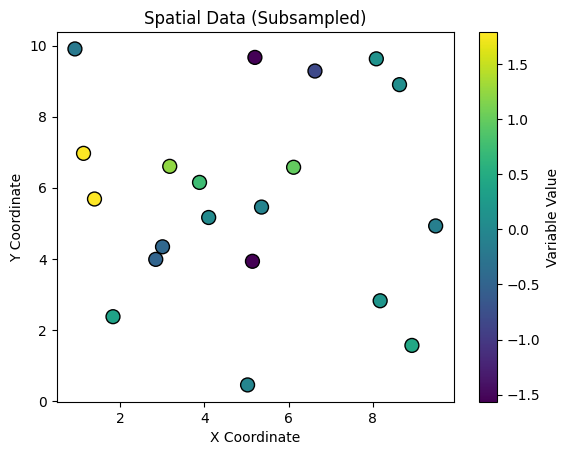

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pykrige.ok import OrdinaryKriging

# Generate synthetic spatial data
np.random.seed(42)
x = np.random.rand(200) * 10
y = np.random.rand(200) * 10
values = np.sin(x) + np.cos(y) + np.random.normal(scale=0.2, size=200)

# Spatial subsampling
sample_indices = np.random.choice(len(x), size=20, replace=False)
x_subsample = x[sample_indices]
y_subsample = y[sample_indices]
values_subsample = values[sample_indices]

# Visualize the data
plt.scatter(x_subsample, y_subsample, c=values_subsample, cmap='viridis', s=100, edgecolors='k', marker='o')
plt.title('Spatial Data (Subsampled)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.colorbar(label='Variable Value')
plt.show()

# Perform Ordinary Kriging
ok = OrdinaryKriging(x_subsample, y_subsample, values_subsample, variogram_model='spherical')
gridx, gridy = np.meshgrid(np.linspace(0, 10, 100), np.linspace(0, 10, 100))
z, ss = ok.execute('grid', gridx.flatten(), gridy.flatten())

# Visualize the kriging result
plt.scatter(x_subsample, y_subsample, c=values_subsample, cmap='viridis', s=100, edgecolors='k', marker='o')
plt.contourf(gridx, gridy, z.reshape(100, 100), cmap='viridis')
plt.title('Ordinary Kriging Result (Subsampled)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.colorbar(label='Variable Value')
plt.show()


In [11]:
!pip install pykrige

  Obtaining dependency information for pykrige from https://files.pythonhosted.org/packages/5e/eb/e6a027ac0d217871c8c9e5341e2a0ed4499dd966eb66c81487281f1b1541/PyKrige-1.7.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.9/897.9 kB 1.4 MB/s eta 0:00:001.4 MB/s eta 0:00:01m

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
